In [1]:
import time

import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
import utils

# Autoregressive (AR) LSTM

## Dataset

Removed inlet and outlet fan speed due to the fact that auto-regression requires all features as inputs and outputs to predict.

In [2]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)

In [3]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = None # all columns
feature_count = len(case_1.columns)

In [4]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [5]:
PLOT_COL = "outlet_70"

## Model creation

In [6]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 20
# features_size = len(label_columns)

In [7]:
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [8]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-16 21:13:14.274848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-16 21:13:14.274968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [10]:
exec_times = {}

In [11]:
results = {}

## Case 2

In [12]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-16 21:13:14.556128: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-16 21:13:15.995048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-16 21:13:18.961567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [13]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell (LSTMCell)        multiple                  38784     
                                                                 
 rnn (RNN)                   multiple                  38784     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  8910      
                                                                 
Total params: 47,694
Trainable params: 47,694
Non-trainable params: 0
_________________________________________________________________


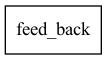

In [14]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-10-16 21:13:47.458971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


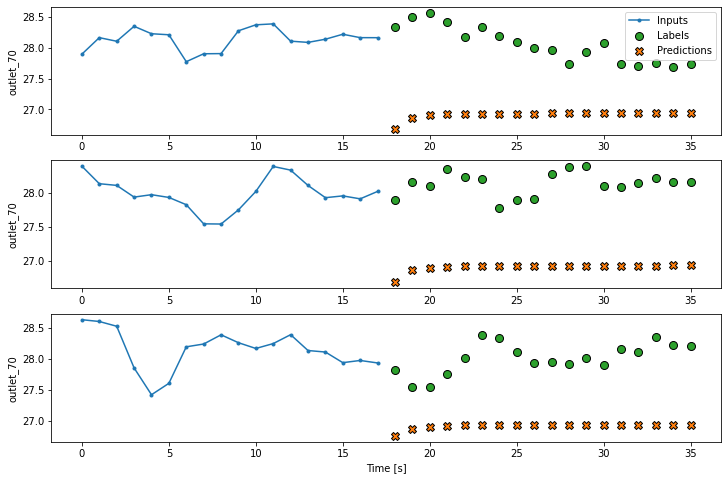

In [15]:
window.plot(feedback_model, plot_col=PLOT_COL)

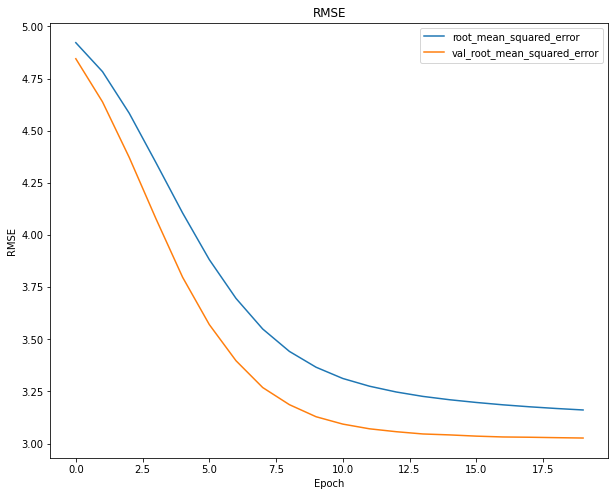

In [16]:
utils.plot_losses(history=history)

In [17]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [18]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

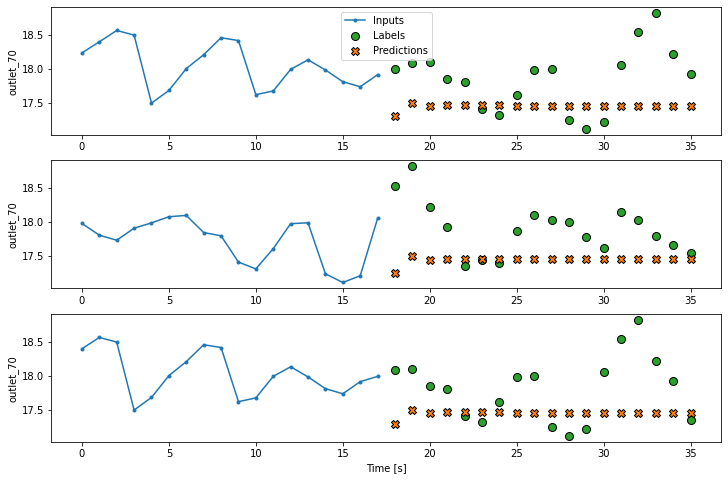

In [19]:
window.plot(feedback_model, plot_col=PLOT_COL)

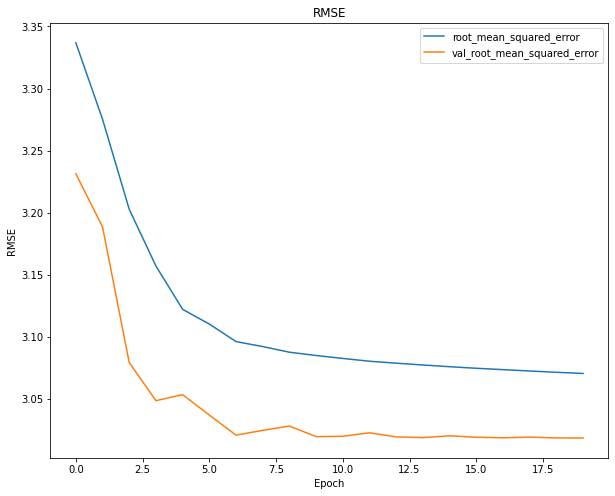

In [20]:
utils.plot_losses(history=history)

In [21]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [22]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_4'] = time.time() - start_t

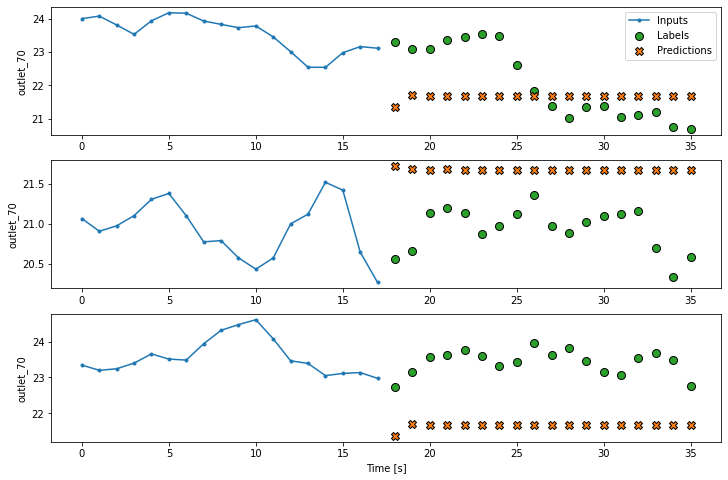

In [23]:
window.plot(feedback_model, plot_col=PLOT_COL)

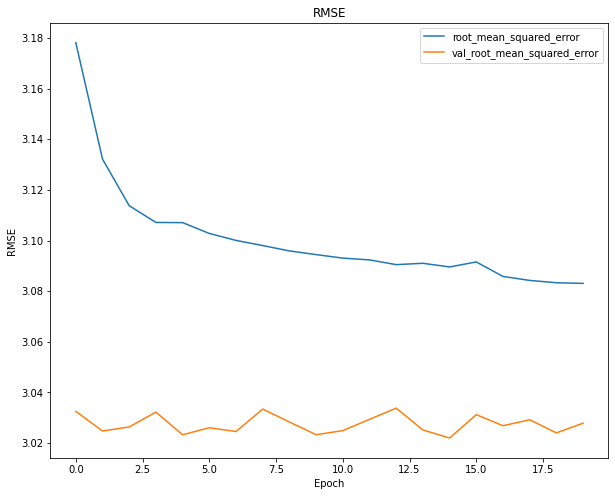

In [24]:
utils.plot_losses(history=history)

In [25]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [26]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

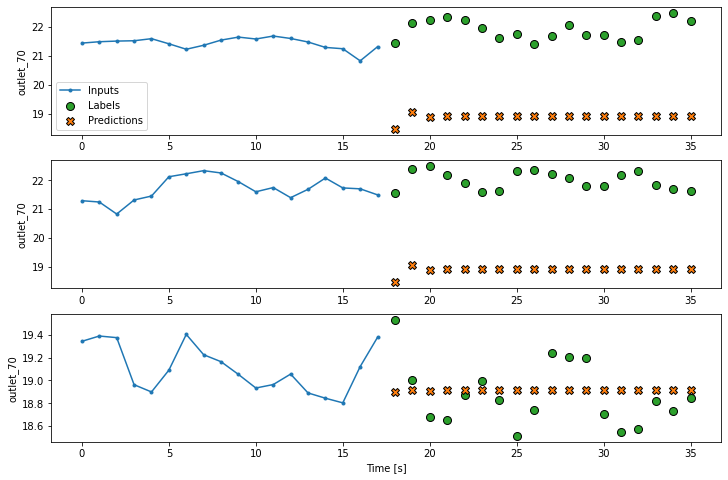

In [27]:
window.plot(feedback_model, plot_col=PLOT_COL)

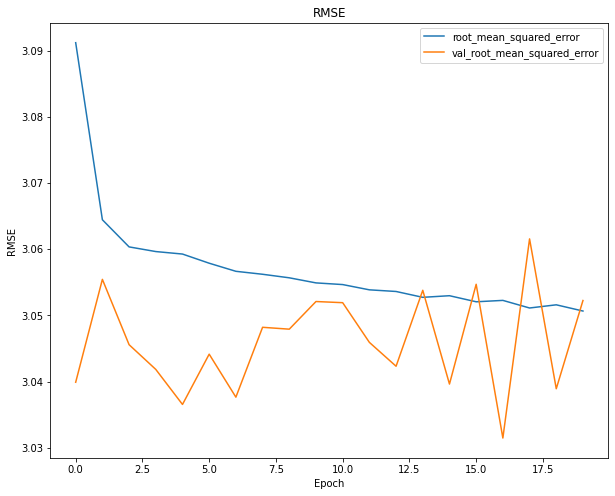

In [28]:
utils.plot_losses(history=history)

In [29]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [30]:
window = utils.WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    # label_columns=label_columns
)

test_res = feedback_model.evaluate(window.train) # Testing

5/5 [==============================] - 1s 108ms/step - loss: 0.0366 - root_mean_squared_error: 0.2162


In [31]:
results['test'] = {
    'loss': utils.inverse_transform(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

In [32]:
pd.DataFrame(results).transpose().round(4)

,loss,rmse,val_loss,val_rmse
case_2,9.7983,3.1611,9.1427,3.0265
case_3,9.3562,3.0706,9.1054,3.0186
case_4,9.4165,3.0831,9.1489,3.0279
case_5,9.2608,3.0506,9.2655,3.0522
test,9.9606,3.1943,NaN,NaN


In [33]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,32.28
case_3,37.10
case_4,65.16
case_5,148.23


In [34]:
total_t = exec_times_df['Time'].sum()
print("Total training time: %dmin %.2fs" % (total_t//60, total_t % 60))

Total training time: 4min 42.76s
